In [18]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import cv2

In [19]:

# Define the directory and base file names for images and JSON files
image_directory = './mask/train/farms/farms'
json_directory = './mask/train/annotations/annotation_farms'
extension = '.png'

# Initialize empty lists to store images and masks
images = []
masks = []

# Loop through the range of image numbers
for i in range(1, 2):
    # Generate the image file path
    image_path = f'{image_directory}{i}{extension}'

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was read successfully
    if img is not None:
        images.append(img)
    else:
        print(f"Error reading {image_path}")

    # Generate the JSON file path
    json_path = f'{json_directory}{i}.json'

    # Read the JSON annotation mask
    try:
        with open(json_path, 'r') as json_file:
            mask_data = json.load(json_file)
        masks.append(mask_data)
        
    except FileNotFoundError:
        print(f"Error reading {json_path}")

In [20]:
# Check if you have successfully read 1 images and masks
if len(images) == 1 and len(masks) == 1:
    print("Successfully read 1 images and masks.")
else:
    print(f"Read {len(images)} images and {len(masks)} masks. Check your file paths.")

Successfully read 1 images and masks.


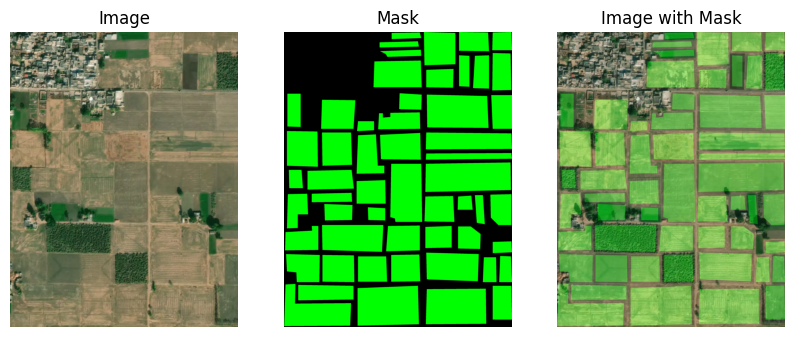

In [21]:
# Plot the 'farms1' image with its mask
index = 0  # Change this to the index of the image you want to plot (e.g., 0 for 'farms1')
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.axis('off')

# Create a mask image from the JSON data (you may need to adapt this part based on your JSON structure)
mask_data = masks[index]
mask = np.zeros_like(images[index], dtype=np.uint8)
for i in range(len(mask_data['Satellite Streets-1694147904194.png']['regions'])):
    polygon = np.array(mask_data['Satellite Streets-1694147904194.png']['regions'][str(i)]['shape_attributes']['all_points_x'], dtype=np.int32), np.array(mask_data['Satellite Streets-1694147904194.png']['regions'][str(i)]['shape_attributes']['all_points_y'], dtype=np.int32)
    polygon = np.transpose(polygon)
    cv2.fillPoly(mask, [polygon], (0, 255, 0))  # Green color for the mask

plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.title('Mask')
plt.axis('off')

# Overlay the mask on the image
masked_image = cv2.addWeighted(images[index], 0.9, mask, 0.3, 0)

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Mask')
plt.axis('off')

plt.show()

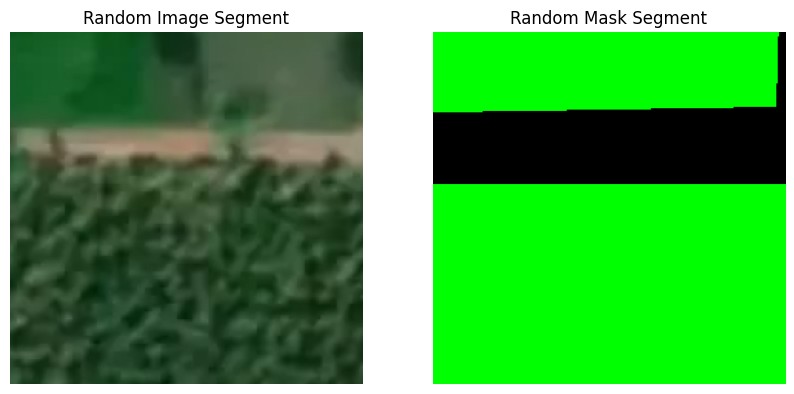

In [28]:
import random

# Function to bisect the image and mask into 256x256 segments
def bisect_image_and_mask(image, mask):
    segments = []
    mask_segments = []
    height, width, _ = image.shape
    segment_size = 256

    for y in range(0, height, segment_size):
        for x in range(0, width, segment_size):
            segment = image[y:y+segment_size, x:x+segment_size]
            mask_segment = mask[y:y+segment_size, x:x+segment_size]

            if segment.shape[:2] == (segment_size, segment_size):
                segments.append(segment)
                mask_segments.append(mask_segment)

    return segments, mask_segments

# Choose a random index
random_index = random.randint(0, len(images) - 1)

# Bisect the image and mask at the random index
bisected_images, bisected_masks = bisect_image_and_mask(images[random_index], mask)

# Randomly select one segment
random_segment_index = random.randint(0, len(bisected_images) - 1)
random_segment = bisected_images[random_segment_index]
random_mask_segment = bisected_masks[random_segment_index]

# Plot the randomly selected segment and its mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(random_segment, cv2.COLOR_BGR2RGB))
plt.title('Random Image Segment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(random_mask_segment, cmap='gray')
plt.title('Random Mask Segment')
plt.axis('off')

plt.show()

In [29]:
len(bisected_images)

108

In [32]:
len(bisected_masks)

108